In [5]:
import pandas as pd
import numpy as np
import matplotlib as plt 
import seaborn as sns
%matplotlib inline 

# Import and assess data set

In [6]:
AccidentData_KNN = pd.read_csv('E:\Training Development\Coursera\IBM Data Science\Course 9 - Capstone Project\Capstone Project Data\AccidentData_4.csv')

In [7]:
AccidentData_KNN.head()

,OBJECTID,SEVERITYCODE,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,Day of week,Month of Year
0,1,2,2,1,9,6,2,3
1,2,1,3,2,9,3,2,12
2,3,1,3,1,1,6,3,11
3,4,1,3,3,1,6,4,3
4,5,2,2,2,9,6,2,1


In [8]:
AccidentData_KNN.dtypes

OBJECTID         int64
SEVERITYCODE     int64
JUNCTIONTYPE     int64
WEATHER          int64
ROADCOND         int64
LIGHTCOND        int64
Day of week      int64
Month of Year    int64
dtype: object

In [9]:
len(AccidentData_KNN.index)

189337

In [10]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [11]:
AccidentData_KNN['SEVERITYCODE'].value_counts()

1    132285
2     57052
Name: SEVERITYCODE, dtype: int64

# Define feature set, X

In [12]:
AccidentData_KNN.columns

Index(['OBJECTID', 'SEVERITYCODE', 'JUNCTIONTYPE', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'Day of week', 'Month of Year'],
      dtype='object')

# Convert the data frame to a numpy array

In [13]:
#To use scikit-learn library, have to convert the Pandas data frame to a Numpy array
X = AccidentData_KNN[['OBJECTID', 'JUNCTIONTYPE', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'Day of week', 'Month of Year']] .values  #.astype(float)
X[0:5]

array([[ 1,  2,  1,  9,  6,  2,  3],
       [ 2,  3,  2,  9,  3,  2, 12],
       [ 3,  3,  1,  1,  6,  3, 11],
       [ 4,  3,  3,  1,  6,  4,  3],
       [ 5,  2,  2,  9,  6,  2,  1]], dtype=int64)

# Define the labels

In [14]:
y = AccidentData_KNN['SEVERITYCODE'].values
y[0:1]

array([2], dtype=int64)

# Normalise the data

In [15]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:10]

array([[-1.71537679, -0.97301587, -0.90075769,  1.4789272 ,  0.35007251,
        -0.49066799, -1.04183148],
       [-1.71536071,  0.31901365, -0.49594889,  1.4789272 , -1.40094051,
        -0.49066799,  1.58661409],
       [-1.71534464,  0.31901365, -0.90075769, -0.71204349,  0.35007251,
         0.02941915,  1.29456458],
       [-1.71532856,  0.31901365, -0.09114008, -0.71204349,  0.35007251,
         0.54950629, -1.04183148],
       [-1.71531248, -0.97301587, -0.49594889,  1.4789272 ,  0.35007251,
        -0.49066799, -1.62593049],
       [-1.7152964 , -0.97301587, -0.09114008, -0.71204349,  0.35007251,
         1.06959343, -0.74978197],
       [-1.71528032, -0.97301587, -0.49594889,  1.4789272 ,  0.35007251,
        -1.01075513,  1.58661409],
       [-1.71524817, -0.97301587, -0.09114008, -0.71204349,  0.35007251,
        -0.49066799, -0.74978197],
       [-1.71523209,  0.31901365, -0.09114008, -0.71204349,  0.35007251,
         0.02941915, -0.16568296],
       [-1.71519993, -0.9730

# Train / test split

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (151469, 7) (151469,)
Test set: (37868, 7) (37868,)


In [17]:
from sklearn.neighbors import KNeighborsClassifier

# Train the data set

# Train and predict the data set

## Train with k = 4

In [18]:
k = 4
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [19]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

## Evaluate accuracy of k = 4

In [20]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.7624002271091774
Test set Accuracy:  0.6750554557938101


## Calculate accuracy with different k values

In [21]:

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.60721453, 0.67003803, 0.63639485, 0.67505546, 0.65012676,
       0.67748495, 0.66269674, 0.67986162, 0.66990599])

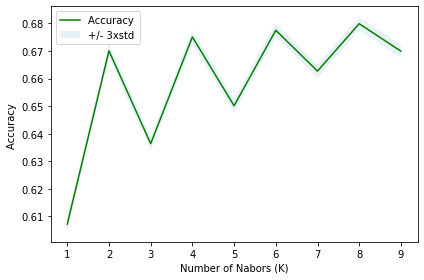

In [22]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [23]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.6798616245906834 with k= 8


# Further model evaluation

In [ ]:
# But, data is not balanced, therefore use the following:
# - F1 score
# - Jaccard index
# - Precision / Recall score

In [25]:
# F1-score
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.6315854204720214

In [26]:
import numpy as np
from sklearn.metrics import jaccard_score

In [27]:
jaccard_score(y_test, yhat)

0.6475497659730446

In [33]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, yhat)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.68
